# 一、SKlearn混合高斯模型参数说明

    GaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

参数：
1. n_components:混合高斯模型个数，默认为1
2. covariance_type:协方差类型，包括{‘full’,‘tied’, ‘diag’, ‘spherical’}四种，分别对应完全协方差矩阵（元素都不为零），相同的完全协方差矩阵（HMM会用到），对角协方差矩阵（非对角为零，对角不为零），球面协方差矩阵（非对角为零，对角完全相同，球面特性），默认‘full’ 完全协方差矩阵
3. tol：EM迭代停止阈值，默认为1e-3.
4. reg_covar:协方差对角非负正则化，保证协方差矩阵均为正，默认为0
5. max_iter:最大迭代次数，默认100
6. n_init:初始化次数，用于产生最佳初始参数，默认为1
7. init_params: {‘kmeans’, ‘random’}, defaults to ‘kmeans’.初始化参数实现方式，默认用kmeans实现，也可以选择随机产生
8. weights_init:各组成模型的先验权重，可以自己设，默认按照7产生
9. means_init:初始化均值，同8
10. precisions_init:初始化精确度（模型个数，特征个数），默认按照7实现
11. random_state :随机数发生器
12. warm_start :若为True，则fit（）调用会以上一次fit（）的结果作为初始化参数，适合相同问题多次fit的情况，能加速收敛，默认为False。
13. verbose :使能迭代信息显示，默认为0，可以为1或者大于1（显示的信息不同）
14. verbose_interval :与13挂钩，若使能迭代信息显示，设置多少次迭代后显示信息，默认10次。

E步：
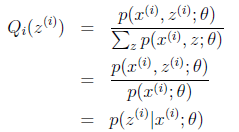

M步：
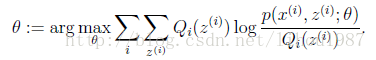

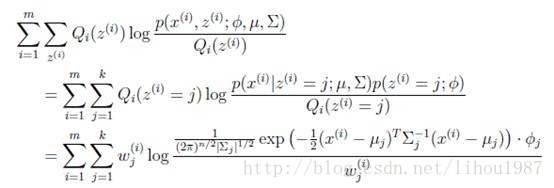

# 类型I：高斯混合模型

    来自不同总体的观测被混合在了一起，形成混合数据（混合高斯模型）。
    使用GaussianMixture，拟合其特征即可

In [1]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

In [2]:
from sklearn.mixture import GaussianMixture
## 只有一个特征（要采用reshape(-1,1))
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X[:,1].reshape(-1,1))

GaussianMixture(n_components=3, random_state=0)

In [3]:
print ('预测均值 = \n', gmm.means_)
print ('预测方差 = \n', gmm.covariances_)
y_hat = gmm.predict(X[:,1].reshape(-1,1))

预测均值 = 
 [[3.68104761]
 [3.04520607]
 [2.51416552]]
预测方差 = 
 [[[0.08442452]]

 [[0.05346299]]

 [[0.0534836 ]]]


### 多个特征的不同组合

In [4]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [5]:
if __name__ == '__main__':
    from sklearn import datasets
    iris = datasets.load_iris() # 导入数据集
    x_prime = iris.data
    y = iris.target.ravel()
    #print(x_prime)
    n_components = 3
    feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
    plt.figure(figsize=(10, 9), facecolor='#FFFFFF')

<Figure size 720x648 with 0 Axes>

In [6]:
for k, pair in enumerate(feature_pairs):
        x = X[:, pair]
        #print(x)   # y是目标值的列向量 它等于分类0，1,2时的值对应的X的位置 就可以算出每一类的实际均值
        m = np.array([np.mean(x[y == i], axis=0) for i in range(3)])  # 均值的实际值
        print ('实际均值 = \n', m)

        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(x)
        print ('预测均值 = \n', gmm.means_)
        print ('预测方差 = \n', gmm.covariances_)
        y_hat = gmm.predict(x)
        order = pairwise_distances_argmin(m, gmm.means_, axis=1, metric='euclidean')
        print ('顺序：\t', order)

实际均值 = 
 [[5.006 3.428]
 [5.936 2.77 ]
 [6.588 2.974]]
预测均值 = 
 [[5.01507898 3.4514463 ]
 [6.68055626 3.02849627]
 [5.9009976  2.74387546]]
预测方差 = 
 [[[0.11944714 0.08835648]
  [0.08835648 0.11893388]]

 [[0.36153508 0.05159664]
  [0.05159664 0.08927917]]

 [[0.27671149 0.08897036]
  [0.08897036 0.09389206]]]
顺序：	 [0 2 1]
实际均值 = 
 [[5.006 1.462]
 [5.936 4.26 ]
 [6.588 5.552]]
预测均值 = 
 [[5.00600062 1.46199859]
 [6.58889015 5.63329865]
 [6.04240837 4.41743067]]
预测方差 = 
 [[[0.12176526 0.01602832]
  [0.01602832 0.02955648]]

 [[0.48521838 0.36602448]
  [0.36602448 0.32601112]]

 [[0.281197   0.23747006]
  [0.23747006 0.31503234]]]
顺序：	 [0 2 1]
实际均值 = 
 [[5.006 0.246]
 [5.936 1.326]
 [6.588 2.026]]
预测均值 = 
 [[5.00606957 0.23932276]
 [6.56319256 2.02396872]
 [5.9485529  1.32071046]]
预测方差 = 
 [[[0.12407215 0.01034544]
  [0.01034544 0.00869516]]

 [[0.41150166 0.05576534]
  [0.05576534 0.077051  ]]

 [[0.29272399 0.08051723]
  [0.08051723 0.05144897]]]
顺序：	 [0 2 1]
实际均值 = 
 [[3.428 1.462]
 [2.

In [7]:
n_sample = y.size
n_types = 3
change = np.empty((n_types, n_sample), dtype=np.bool)
for i in range(n_types):
    change[i] = y_hat == order[i]
for i in range(n_types):
    y_hat[change[i]] = i
acc = u'准确率：%.2f%%' % (100*np.mean(y_hat == y))
print (acc)

准确率：97.33%


# 类型II:三硬币问题（混合的伯努利模型）

    按一定概率抽取两个总体，各个总体的分布不尽相同（如贝叶斯分布），观测到的数据按照一个概率分布

In [8]:
from scipy import stats
import numpy as np
# 硬币投掷结果观测序列
observations = np.array([[1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
                         [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
                         [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
                         [1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
                         [0, 1, 1, 1, 0, 1, 1, 1, 0, 1]])

In [9]:
def em_single(priors, observations):
    """
    EM算法单次迭代
    Arguments
    ---------
    priors : [theta_A, theta_B]
    observations : [m X n matrix]
 
    Returns
    --------
    new_priors: [new_theta_A, new_theta_B]
    :param priors:
    :param observations:
    :return:
    """
    counts = {'A': {'H': 0, 'T': 0}, 'B': {'H': 0, 'T': 0}}
    theta_A = priors[0]
    theta_B = priors[1]
    # E step
    for observation in observations:
        len_observation = len(observation)
        num_heads = observation.sum()
        num_tails = len_observation - num_heads
        # 在不同总体下，观测产生的概率
        contribution_A = stats.binom.pmf(num_heads, len_observation, theta_A)
        contribution_B = stats.binom.pmf(num_heads, len_observation, theta_B)   # 两个二项分布
        weight_A = contribution_A / (contribution_A + contribution_B)
        weight_B = contribution_B / (contribution_A + contribution_B)
        # 更新在当前参数下A、B硬币产生的正反面次数
        counts['A']['H'] += weight_A * num_heads
        counts['A']['T'] += weight_A * num_tails
        counts['B']['H'] += weight_B * num_heads
        counts['B']['T'] += weight_B * num_tails
    
    # M step
    new_theta_A = counts['A']['H'] / (counts['A']['H'] + counts['A']['T'])
    new_theta_B = counts['B']['H'] / (counts['B']['H'] + counts['B']['T'])
    return [new_theta_A, new_theta_B]

def em(observations, prior, tol=1e-6, iterations=10000):
    """
    EM算法
    :param observations: 观测数据
    :param prior: 模型初值
    :param tol: 迭代结束阈值
    :param iterations: 最大迭代次数
    :return: 局部最优的模型参数
    """
    import math
    iteration = 0
    while iteration < iterations:
        new_prior = em_single(prior, observations)
        delta_change = np.abs(prior[0] - new_prior[0])
        if delta_change < tol:
            break
        else:
            prior = new_prior
            iteration += 1
    return [new_prior, iteration]

# 这里默认A, B两个是等可能的
if __name__ == "__main__":
    result=em(observations, [0.6, 0.4])
    print(result)

[[0.7967887863838075, 0.51958314107701], 13]


# 拓展：在大数定律的约束下，将任何分布(伯努利分布)转化为正态分布

## 在样本足够大的情况下，可将混合伯努利分布转化为混合高斯分布

In [12]:
from scipy.stats import binom
pa, pb = 0.3, 0.7
n = 100
import numpy as np
observations = [binom.rvs(p = pa, n = n),
                         binom.rvs(p = pa, n = n),
                         binom.rvs(p = pb, n = n),
                         binom.rvs(p = pb, n = n),
                         binom.rvs(p = pa, n = n)]
feature = []
for observation in observations:
    feature.append(observation/n)
feature = np.array(feature)# 转换为numpy矩阵
feature

array([0.39, 0.32, 0.67, 0.69, 0.25])

In [13]:
from sklearn.mixture import GaussianMixture
## 只有一个特征（要采用reshape(-1,1))
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(feature.reshape(-1,1))

print ('预测均值 = \n', gmm.means_)
print ('预测方差 = \n', gmm.covariances_)
y_hat = gmm.predict(feature.reshape(-1,1))
print(y_hat)

预测均值 = 
 [[0.32]
 [0.68]]
预测方差 = 
 [[[0.00326767]]

 [[0.000101  ]]]
[0 0 1 1 0]


# 类型III: 通用的E-M算法(以possion分布和指数分布为例)


#### question one: 来自不同总体的不等长观测序列

In [128]:
# 离散
from scipy.stats import poisson
mu1, mu2 = 2, 8
n = 100
import numpy as np
observations = np.array([poisson.rvs(mu = mu1, size =n),
                poisson.rvs(mu = mu2, size =n),
                poisson.rvs(mu = mu1, size =n),
                poisson.rvs(mu = mu2, size =n),
                poisson.rvs(mu = mu1, size =n)])
# 注： 这里的待估参数是poisson的期望值，隐变量是每条序列的的属性值0/1

In [226]:
# 如果每一个样本都以一定概率来自不同的总体，则默认这个观测序列长度为1
from scipy.stats import poisson
mu1, mu2 = 2, 8
n = 100
import numpy as np
observations = np.array([poisson.rvs(mu = mu1, size =n),
                         poisson.rvs(mu = mu2, size =n)]).reshape(2*n, 1)

In [228]:
# 根据参数，计算观测序列出现的概率的对数
def pdf(x, theta):
    return np.log(poisson.pmf(x, mu = theta)).sum()  

# 根据数据计算最优参数
def fit(x):
    loss = []
    # 这个函数跑太慢了，导致整个程序运行很慢，需要改进算法
    # 也可以通过调整参数值范围，来加快运行速度，但只能缩短50-60%的时间
    theta = np.arange(1, 10000)/100 # 参数的备选集合(0.1 - 100 , 步长为0.1)
    for i in theta:
        loss.append(np.log(poisson.pmf(x, mu = i)).sum())
    loss = np.array(loss)
    new_theta = (np.argmax(loss)+1)/100
    
    return new_theta

def em_single(priors, observations):
    """
    EM算法单次迭代
    Arguments
    ---------
    priors : [theta_A, theta_B]
    observations : [m X n matrix]
 
    Returns
    --------
    new_priors: [new_theta_A, new_theta_B]
    :param priors:
    :param observations:
    :return:
    """
    theta_A = priors[0]
    theta_B = priors[1]
    # E step, 以当前参数推断隐变量的值
    Z = []
    for observation in observations:        
        loss = pdf(observation, theta_A) - pdf(observation, theta_B)
        Z.append(loss)
        
    Z = np.array(Z) # 隐变量生成
    Z = Z/abs(max(Z)) # 若Z>0, 则倾向于选择theta_A, 越大越倾向于选择theta_A
    
    # M step
    
    # 将属于同一总体的的数据整合到一起进行估计
    observation_A = observations[np.where(Z >= 0 )]
    observation_B = observations[np.where(Z < 0 )]
    
    # 在新的数据集上估计参数
    if len(observation_A) == 0:
        observation_A = observations[np.argmax(Z)]
        
    if len(observation_B) == 0:
        observation_B = observations[np.argmin(Z)]
    
    new_theta_A = fit(observation_A)
    new_theta_B = fit(observation_B)
        
    return [new_theta_A, new_theta_B], np.around(Z, decimals=3)

In [229]:
def em(observations, prior, tol=1e-6, iterations=100):
    """
    EM算法
    :param observations: 观测数据
    :param prior: 模型初值
    :param tol: 迭代结束阈值
    :param iterations: 最大迭代次数
    :return: 局部最优的模型参数
    """
    iteration = 0
    while iteration < iterations:
        new_prior,Z = em_single(prior, observations)
        delta_change = np.abs(np.array(prior)-np.array(new_prior)).sum()
        if delta_change < tol:
            break
        else:
            prior = new_prior
            iteration += 1
    return [iteration, new_prior, Z]

# 这里默认A, B两个是等可能的
if __name__ == "__main__":
    result=em(observations, [12, 10])
    print("迭代次数：", result[0])
    print("参数：", result[1])
    print("每个序列的所属：", result[2])

迭代次数： 4
参数： [8.49, 2.02]
每个序列的所属： [-0.144 -0.334 -0.334 -0.239 -0.334 -0.334 -0.334  0.238 -0.239 -0.144
 -0.239 -0.334 -0.334 -0.334 -0.334 -0.048 -0.334 -0.334 -0.334  0.047
 -0.239 -0.144 -0.239 -0.334 -0.144 -0.334 -0.334 -0.334 -0.334 -0.144
 -0.048 -0.429 -0.239 -0.334 -0.334 -0.048 -0.144 -0.334 -0.048 -0.334
 -0.429 -0.239 -0.429 -0.239 -0.239 -0.429 -0.239 -0.048 -0.429 -0.048
  0.047 -0.144 -0.334 -0.429 -0.239 -0.429 -0.239 -0.239 -0.239 -0.429
 -0.144 -0.048 -0.429 -0.144 -0.429 -0.144 -0.239 -0.144 -0.239 -0.429
 -0.334 -0.144  0.047 -0.144 -0.334 -0.239 -0.334  0.047 -0.048 -0.429
 -0.429 -0.429 -0.239 -0.144 -0.144 -0.334 -0.334 -0.144 -0.239 -0.144
 -0.334 -0.144 -0.334 -0.048 -0.048 -0.144 -0.239 -0.048  0.047 -0.239
  0.238  0.428  0.619  0.142 -0.239  0.333  0.524 -0.144 -0.048  0.142
  0.238  0.142  1.     0.524  0.333  0.047  0.619  0.333  0.238 -0.048
  0.809  0.714  0.619  0.524  0.333  0.142  0.142  0.333  0.619  0.238
  0.047  0.428  0.142  0.428  0.238  0.238 

In [189]:
# 连续
from scipy.stats import expon
mu1, mu2 = 2, 15
n = 100
import numpy as np
observations = np.array([expon.rvs(loc=0, scale=mu1, size=n),
                         expon.rvs(loc=0, scale=mu2, size=n),
                         expon.rvs(loc=0, scale=mu1, size=n),
                         expon.rvs(loc=0, scale=mu2, size=n),
                         expon.rvs(loc=0, scale=mu1, size=n)])
# 注： 这里的待估参数是poisson的期望值，隐变量是每条序列的的属性值0/1

In [1]:
# 如果每一个样本都以一定概率来自不同地总体，则默认这个观测序列长度为1
from scipy.stats import expon
mu1, mu2 = 2, 15
n = 100
import numpy as np
observations = np.array([expon.rvs(loc=0, scale=mu1, size=n),
                         expon.rvs(loc=0, scale=mu2, size=n)]).reshape(2*n, 1)
# 注： 这里的待估参数是poisson的期望值，隐变量是每条序列的的属性值0/1

In [2]:
# 根据参数，计算观测序列出现的概率的对数
def pdf(x, theta):
    return np.log(expon.pdf(x, loc=0, scale=theta)).sum()

# 根据数据计算最优参数
def fit(x):
    new_theta = expon.fit(observations)[1]
    
    return new_theta

def em_single(priors, observations):
    """
    EM算法单次迭代
    Arguments
    ---------
    priors : [theta_A, theta_B]
    observations : [m X n matrix]
 
    Returns
    --------
    new_priors: [new_theta_A, new_theta_B]
    :param priors:
    :param observations:
    :return:
    """
    theta_A = priors[0]
    theta_B = priors[1]
    # E step, 以当前参数推断隐变量的值
    Z = []
    for observation in observations:        
        loss = pdf(observation, theta_A) - pdf(observation, theta_B)
        Z.append(loss)
        
    Z = np.array(Z) # 隐变量生成
    Z = Z/abs(max(Z)) # 若Z>0, 则倾向于选择theta_A, 越大越倾向于选择theta_A
    
    # M step
    
    # 将属于同一总体的的数据整合到一起进行估计
    observation_A = observations[np.where(Z >= 0 )]
    observation_B = observations[np.where(Z < 0 )]
    
    # 在新的数据集上估计参数
    if len(observation_A) == 0:
        observation_A = observations[np.argmax(Z)]
        
    if len(observation_B) == 0:
        observation_B = observations[np.argmin(Z)]
    
    new_theta_A = expon.fit(observation_A)[1]
    new_theta_B = expon.fit(observation_B)[1]
    #new_theta_A = fit(observation_A)
    #new_theta_B = fit(observation_B) # tuple数据 传递出现了错误   
    
    return [new_theta_A, new_theta_B], np.around(Z, decimals=3)

In [6]:
def em(observations, priors, tol=1e-6, iterations=100):
    """
    EM算法
    :param observations: 观测数据
    :param prior: 模型初值
    :param tol: 迭代结束阈值
    :param iterations: 最大迭代次数
    :return: 局部最优的模型参数
    """
    iteration = 0
    while iteration < iterations:
        new_priors, Z = em_single(priors, observations)
        delta_change = abs(np.array(priors) - np.array(new_priors)).sum()
        if delta_change < tol:
            break
        else:
            priors = new_priors
            iteration += 1
    new_priors = np.around(new_priors, decimals=3)
    
    return [iteration, new_priors, Z]

# 这里默认A, B两个是等可能的
if __name__ == "__main__":
    result=em(observations, [10, 18])
    print("迭代次数：", result[0])
    print("参数：", result[1])
    print("每个序列的所属：\n", result[2])

迭代次数： 11
参数： [ 1.294 10.334]
每个序列的所属：
 [  0.95   -0.704   0.106   0.642  -0.087  -0.046   0.836   0.536  -0.4
   0.109  -1.041   0.99    0.906   0.235   0.843   0.605   0.613   0.903
   0.957  -1.073   1.      0.486   0.729   0.985   0.739   0.512  -1.201
   0.335   0.938   0.917   0.672   0.236   0.891   0.989   0.076   0.645
   0.193  -0.158   0.834  -0.258   0.563   0.996   0.112   0.267   0.421
   0.381   0.544   0.817  -0.219   0.207   0.993   0.939  -0.46    0.389
   0.678  -0.947   0.116   0.88    0.869   0.542   0.632   0.228   0.255
   0.118   0.388   0.49    0.338  -0.487   0.537   0.324   0.44    0.826
   0.838   0.614   0.423   0.874   0.249   0.232   0.781  -0.811   0.98
   0.608  -0.025  -1.096   0.816   0.23    0.81    0.807   0.357   0.523
   0.719  -0.703   0.274  -0.129   0.883   0.776  -0.103   0.056   0.25
   0.312  -0.853  -0.66   -1.45   -0.345  -2.027  -0.818  -2.25   -5.887
   0.58    0.34   -0.156  -4.283  -0.7    -4.299  -0.081  -9.933  -1.354
   0.979  -1.205

# 高斯混合模型的数学解

In [3]:
#（1）首先将模型完全转换成对数计算，根据高斯密度函数公式分别计算k个组成高斯模型的log值，即logP(x|z)的值
def _estimate_log_gaussian_prob(X, means, precisions_chol, covariance_type):
# 计算精度矩阵的1/2次方log_det（代码精度矩阵是通过cholesky获取）
    log_det = _compute_log_det_cholesky(
        precisions_chol, covariance_type, n_features)
# 对应上面四种协方差类型，分别计算精度矩阵与（x-u)相乘那部分log_prob
    if covariance_type == 'full':
        log_prob = np.empty((n_samples, n_components))
        for k, (mu, prec_chol) in enumerate(zip(means, precisions_chol)):
            y = np.dot(X, prec_chol) - np.dot(mu, prec_chol)
            log_prob[:, k] = np.sum(np.square(y), axis=1)

    elif covariance_type == 'tied':
        log_prob = np.empty((n_samples, n_components))
        for k, mu in enumerate(means):
            y = np.dot(X, precisions_chol) - np.dot(mu, precisions_chol)
            log_prob[:, k] = np.sum(np.square(y), axis=1)

    elif covariance_type == 'diag':
        precisions = precisions_chol ** 2
        log_prob = (np.sum((means ** 2 * precisions), 1) -
                    2. * np.dot(X, (means * precisions).T) +
                    np.dot(X ** 2, precisions.T))

    elif covariance_type == 'spherical':
        precisions = precisions_chol ** 2
        log_prob = (np.sum(means ** 2, 1) * precisions -
                    2 * np.dot(X, means.T * precisions) +
                    np.outer(row_norms(X, squared=True), precisions))
    # 最后计算出logP(x|z)的值
    return -.5 * (n_features * np.log(2 * np.pi) + log_prob) + log_det 

In [2]:
#（2）P(x|z)*P(z)计算每个模型的概率分布P(x,z),求对数则就是相加了
def _estimate_weighted_log_prob(self, X):
    return self._estimate_log_prob(X) + self._estimate_log_weights()

#（3）最后开始计算每个模型的后验概率logP(z|x)，即Q函数
def _estimate_log_prob_resp(self, X):
    weighted_log_prob = self._estimate_weighted_log_prob(X)
    #计算P(X)
    log_prob_norm = logsumexp(weighted_log_prob, axis=1)
    with np.errstate(under='ignore'):
        # 忽略下溢,计算每个高斯模型的后验概率，即占比，对数则相减
        log_resp = weighted_log_prob - log_prob_norm[:, np.newaxis]
    return log_prob_norm, log_resp



In [10]:
#(4)调用以上函数
 #返回所有样本的概率均值，及每个高斯分布的Q值
def _e_step(self, X):
    log_prob_norm, log_resp = self._estimate_log_prob_resp(X)
    return np.mean(log_prob_norm), log_resp

#2.对应M step
def _m_step(self, X, log_resp):
#根据上面获得的每个高斯模型的Q值(log_resp)。重新估算均值self.means_，协方差self.covariances_
# 当前符合各高斯模型的样本数目self.weights_（函数名起的像权重，实际指的是数目）
    n_samples,_  = X.shape
    self.weights_, self.means_, self.covariances_ = (
            _estimate_gaussian_parameters(X, np.exp(log_resp), self.reg_covar,
                                          self.covariance_type))
#更新当前各高斯模型的先验概率，即P(Z)
    self.weights_ /= n_samples
#根据cholesky分解计算精度矩阵
    self.precisions_cholesky_ = _compute_precision_cholesky(
        self.covariances_, self.covariance_type)